p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

D.mel_EE v.s. D.mel_Ctrl-: Custom statistical test, P_val:2.868e-89
H.sap_EE v.s. H.sap_Ctrl-: Custom statistical test, P_val:0.000e+00
A.tha_EE v.s. A.tha_Ctrl-: Custom statistical test, P_val:1.835e-111
M.mus_EE v.s. M.mus_Ctrl-: Custom statistical test, P_val:4.601e-18
D.mel_EE v.s. D.mel_Ctrl+: Custom statistical test, P_val:1.000e+00
H.sap_EE v.s. H.sap_Ctrl+: Custom statistical test, P_val:3.449e-07
M.mus_EE v.s. M.mus_Ctrl+: Custom statistical test, P_val:1.000e+00
A.tha_EE v.s. A.tha_Ctrl+: Custom statistical test, P_val:1.770e-10


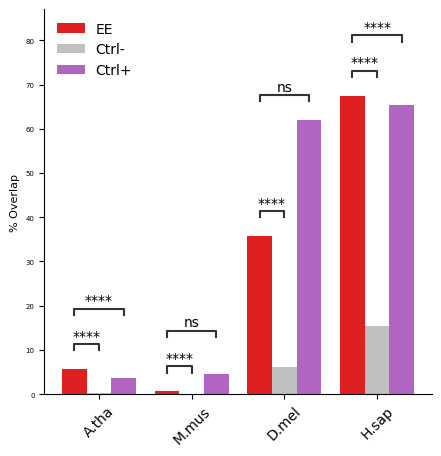

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from matplotlib.patches import Patch
matplotlib.rcParams['pdf.fonttype'] = 42
plt.figure(figsize=(5, 5))

### Results of overlap for other species from other_species_overlap_starr.sh
# MM EE STARR: 72 Perc:0.588
# MM NEG STARR: 12 Perc:0.065
# MM POS STARR: 6649 Perc:4.455
# DM EE STARR: 3690 Perc:26.957
# DM NEG STARR: 19 Perc:2.104
# DM NEG STARR 5 : 238 Perc:5.065
# DM NEG STARR 5eq: 301 Perc:5.159
# DM POS STARR: 48812 Perc:36.631
# TAIR EE STARR: 403 Perc:5.645
# TAIR NEG STARR: 14 Perc:0.178
# TAIR POS STARR: 322 Perc:3.567
# HG EE STARR: 9095 Perc:67.465
# HG NEG STARR: 2041 Perc:15.400
# HG POS STARR: 264445 Perc:65.404

dataf = [
{"Dataset":"A.tha","Exons":"EE","Count":(403*100/7138)},  
{"Dataset":"A.tha","Exons":"Ctrl-","Count":14*100/7862}, 
{"Dataset":"A.tha","Exons":"Ctrl+","Count":322*100/9025},

{"Dataset":"M.mus","Exons":"EE","Count":(72*100/12244)},  
{"Dataset":"M.mus","Exons":"Ctrl-","Count":12*100/18457}, 
{"Dataset":"M.mus","Exons":"Ctrl+","Count":6648*100/149241},

{"Dataset":"D.mel","Exons":"EE","Count":(4890*100/13688)},  
{"Dataset":"D.mel","Exons":"Ctrl-","Count":55*100/903}, 
{"Dataset":"D.mel","Exons":"Ctrl+","Count":82557*100/133253},

{"Dataset":"H.sap","Exons":"EE","Count":(9095*100/13481)}, 
{"Dataset":"H.sap","Exons":"Ctrl-","Count":2041*100/13253},
{"Dataset":"H.sap","Exons":"Ctrl+","Count":264445*100/404325},
]

df = pd.DataFrame(dataf)

clrs = ['red' if (y == (403*100/7138)) else 'silver' if (y == (14*100/7862)) else "mediumorchid" for y in df["Count"]]

ax = sns.barplot(data=df, x="Dataset", y="Count", hue="Exons",palette=clrs)

from statannot import add_stat_annotation
box_pairs = [
    (("A.tha", "EE"), ("A.tha", "Ctrl-")),
    (("A.tha", "EE"), ("A.tha", "Ctrl+")),
    (("M.mus", "EE"), ("M.mus", "Ctrl-")),
    (("M.mus", "EE"), ("M.mus", "Ctrl+")),
    (("D.mel", "EE"), ("D.mel", "Ctrl-")),
    (("D.mel", "EE"), ("D.mel", "Ctrl+")),
    (("H.sap", "EE"), ("H.sap", "Ctrl-")),
    (("H.sap", "EE"), ("H.sap", "Ctrl+")),
]

custom_pvalues = [1.834640056030006e-111,1.7703393291576863e-10,4.601337552000658e-18,1.0,2.8684547627697224e-89,1,0.0,3.448837804945186e-07] #fisher test

add_stat_annotation(ax, data=df, x="Dataset", y="Count", hue="Exons", order=["A.tha","M.mus","D.mel","H.sap"],
                    box_pairs=box_pairs,
                    pvalues=custom_pvalues, perform_stat_test=False, test=None, text_format='star', loc='inside', verbose=1)

plt.legend(frameon=False)
plt.yticks(fontsize=5)
plt.xticks(fontsize=10, rotation=45)
plt.xlabel("", fontsize=8)
plt.ylabel("% Overlap", fontsize=8)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
###########################################################################################################

plt.savefig("/home/mouren/Images/tls1/main_figures/fig2/overlap_starr_all_species.pdf", format="pdf", bbox_inches="tight")
plt.savefig("/home/mouren/Images/tls1/main_figures/fig2/overlap_starr_all_species.png", format="png", bbox_inches="tight")

plt.show()

In [1]:
### calculate p-value for starr-seq overlap 
from scipy.stats import fisher_exact
import numpy as np

hsap_neg = np.array([[9095, 2041],
                  [13481-9095, 13253-2041]])

hsap_pos = np.array([[9095, 264445],
                  [13481-9095, 404325-264445]])

dmel_neg = np.array([[3690, 19],
                  [13688-3690, 903-19]])

dmel_pos = np.array([[3690, 48812],
                  [13688-3690, 133253-48812]])

print(fisher_exact(hsap_neg,alternative="greater")) 
print(fisher_exact(hsap_pos,alternative="greater")) 
print(fisher_exact(dmel_neg,alternative="greater")) 
print(fisher_exact(dmel_pos,alternative="greater")) 

SignificanceResult(statistic=11.391322842959637, pvalue=0.0)
SignificanceResult(statistic=1.0968679321222845, pvalue=3.448837804945186e-07)
SignificanceResult(statistic=17.171644855286846, pvalue=2.8684547627697224e-89)
SignificanceResult(statistic=0.6384692696959453, pvalue=1.0)


In [2]:
from scipy.stats import fisher_exact
import numpy as np

mm_neg = np.array([[72, 12],
                  [12244-72, 18457-12]])

mm_pos = np.array([[72, 6648],
                  [12244-72, 149241-6648]])

t_neg = np.array([[403, 14],
                  [7138-403, 7862-14]])

t_pos = np.array([[403, 322],
                  [7138-403, 9025-322]])

print(fisher_exact(mm_neg,alternative="greater")) 
print(fisher_exact(mm_pos,alternative="greater")) 
print(fisher_exact(t_neg,alternative="greater")) 
print(fisher_exact(t_pos,alternative="greater")) 

SignificanceResult(statistic=9.09217877094972, pvalue=4.601337552000658e-18)
SignificanceResult(statistic=0.1268754945658557, pvalue=1.0)
SignificanceResult(statistic=33.54272987591473, pvalue=1.834640056030006e-111)
SignificanceResult(statistic=1.6172626540690838, pvalue=1.7703393291576863e-10)
